### **Custom Datasets**

In [2]:
import torch
import torch.nn as nn

torch.__version__

'2.3.0.dev20240218+cu121'

In [4]:
# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

### **Get the data**

In [8]:
import requests
import zipfile
from pathlib import Path

# setup path to data
data_path = Path('data/')
image_path = data_path / "pizza_steak_sushi"

# create dta path if not exist 
if image_path.is_dir():
    print(f'{image_path} directory already exists.... skipping download')

else:
    print(f'{image_path} does not exits, createing one....')
    image_path.mkdir(parents=True,exist_ok=True)

# download pizza,steak,sushi
with open(data_path / "pizza_steak_sushi.zip",'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print(f'Downloading data')
    f.write(request.content)

# unzip data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists.... skipping download


### **Becoming one with the data**

In [9]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')        

In [10]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [12]:
### setup train and testing path
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### **Visualize and image**

data/pizza_steak_sushi/train/pizza/2811032.jpg
pizza
Random image path: data/pizza_steak_sushi/train/pizza/2811032.jpg
Image class: pizza
Image hight: 512
Image width: 512


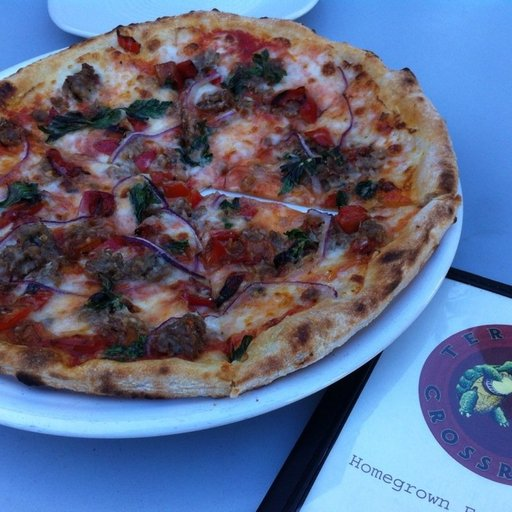

In [73]:
import random
from PIL import Image

# set seed
# random.seed(42)

# Get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

# pick a ramdom path image_path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# Get imgage class from path name
image_class = random_image_path.parent.stem
print(image_class)

# open image
img = Image.open(random_image_path)

# print metadata
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image hight: {img.height}')
print(f'Image width: {img.width}')
img